# Projeto Capacitação de dados

## importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### Importando as bases de dados
airport = pd.read_csv(r"C:\Users\augus\Desktop\airports.csv")
user = pd.read_csv(r"C:\Users\augus\Desktop\users.csv")

In [3]:
### Excluindo registros nulos do campo "country" apenas para exemplificar o que queremos para o dataset final.
airport.dropna(subset = ["country"], inplace = True)

In [4]:
### Ainda temos uma quantidade elevada de registros e boa parte das linhas ainda possuem dados faltantes.
### Como desejamos apenas uma amostra do nosso banco, realizaremos abaixo mais uma limpeza, pois queremos que todos os campos estejam preenchidos
airport.shape[0]

861

In [5]:
airport.head(10)

,airport,country,continent,airports_group
1,MVF,BR,NaN,NaN
2,OGG,US,NaN,NaN
3,YYT,CA,NaN,NaN
4,ASE,US,NaN,NaN
5,ELS,ZA,NaN,NaN
6,KRL,CN,NaN,NaN
7,MMX,SE,NaN,NaN
8,ACC,GH,NaN,NaN
9,REP,KH,NaN,NaN
10,YQM,CA,NaN,NaN


In [5]:
### Observou-se acima que temos uma infinidade de aeroportos que não apresentam informações de continente
### Dado este que será muito importante para nossas análises. Sendo assim realizaremos uma limpeza nesta série.
airport.dropna(subset = ["continent"], inplace = True)

In [7]:
airport.shape[0]

796

In [8]:
### Limpeza realizada, partiremos para unir as tabelas e  realizar as análises necessárias

combine = user.merge(airport, left_on='airport_to', right_on='airport')

# Primeira Análise

In [24]:
### Para primeira análise, vamos agrupar e somar a quantidade de voos comprados para os destinos internacionais saindo do Brasil
### Com a criação de query, vamos determinar a conversão das buscas realizadas em compras em nosso site
### A partir deste momento, buscar soluções para aumentar as vendas.
inter = combine.query('country != "BR"').groupby("airport_to").sum().sort_values(by = "comprou", ascending=False).head(10)
inter

,buscou,colocou_no_carrinho,comprou
airport_to,,,
EZE,23458,37350,5137
SCL,103230,32097,4931
LIS,103552,25369,2656
MIA,89557,20999,2484
MCO,58404,16101,1604
LHR,9260,8514,1474
ASU,24686,5990,1219
JFK,13248,10520,1192
MVD,25788,6541,1120


In [25]:
inter.describe()

,buscou,colocou_no_carrinho,comprou
count,10.000000,10.000000,10.000000
mean,45790.800000,17056.400000,2276.200000
std,39404.088135,11410.573695,1560.519842
min,6725.000000,5990.000000,945.000000
25%,15800.500000,7440.750000,1198.750000
50%,25237.000000,13310.500000,1539.000000
75%,81768.750000,24276.500000,2613.000000
max,103552.000000,37350.000000,5137.000000


In [10]:
### Foi possível observar que temos mais procura para o destino de Lisboa do que para Santiago,
### porém a taxa de conversão em compras para o Santiago é quase o dobro 4,7% contra 2,5% de taxa de conversão
### Outro fator relevante foi a taxa de conversão de compra dos bilhetes para Londres(Heathrow) cerca de 15,91%
### Fator este que deve ser analisado profundamente para desenvolver ações de maior procura pelo destino, como promoções,
### matérias no blog e até mesmo proporcionar um roteiro acessível, com parcerias com hostels, uma vez que a moeda local é elevada em comparação ao real 
### Paris possui um caso semelhante com taxa de conversão de 14,05%.


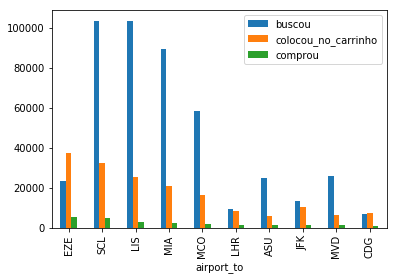

In [13]:
inter.plot(kind = "bar")

# Segunda Análise

In [22]:
region = combine.query('airports_group == "SAO"').groupby("airport_to").sum().sort_values(by = "comprou", ascending=False).head(10)
region


,buscou,colocou_no_carrinho,comprou
airport_to,,,
GRU,590184,336489,84500
CGH,450160,229476,71942
VCP,141479,52937,12387


In [23]:
region.describe()

,buscou,colocou_no_carrinho,comprou
count,3.000000,3.000000,3.000000
mean,393941.000000,206300.666667,56276.333333
std,229574.554834,143189.581438,38524.421168
min,141479.000000,52937.000000,12387.000000
25%,295819.500000,141206.500000,42164.500000
50%,450160.000000,229476.000000,71942.000000
75%,520172.000000,282982.500000,78221.000000
max,590184.000000,336489.000000,84500.000000


In [15]:
### CGH = 15,98% - VCP = 8,7% - GRU 14,31%
### A busca para o aeroporto de campinas é 1/3 da busca do aeroporto de Congonhas, porém a porcentagem de conversão de compra é quase a metade
### Guarulhos possui uma taxa elevada de busca, porém a taxa conversão em compra em função da busca é menor que a taxa de conversão de congonhas
### Em média voar direto para Congonhas é mais caro que para Guarulhos, porém e se oferecermos um serviço combo com descontos para o deslocamento
### De Guarulhos para o centro da cidade. Com uma boa parceria, podemos oferecer a possibilidade para os clientes que procuram o melhor preço.

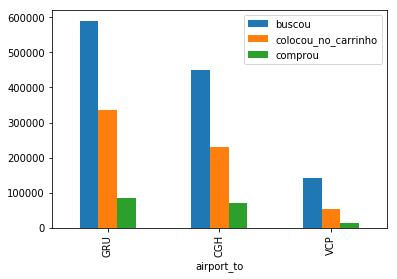

In [17]:
region.plot(kind = "bar")

# Terceira Análise

In [18]:
ofertante = user.groupby("ano_mes_da_acao").sum().sort_values(by = "comprou")

In [19]:
ofertante

,buscou,colocou_no_carrinho,comprou
ano_mes_da_acao,,,
2018-09,7,1,0
2019-10,5,0,0
2019-05,813247,142337,31193
2019-06,860999,167404,33560
2019-07,1055208,210115,38143
2019-09,946538,199862,39881
2019-08,1050087,224958,44485
2018-10,829055,179249,47464
2019-04,1183907,289121,73237


In [20]:
### É possível observar que entre os meses de Maio e Outubro, temos uma quantidade de buscas e compras abaixo da média anual que é de
### 53455 passagens compradas, sendo assim e tal período, podemos realizar mudanças na estrutura do setor de operações para captação de ofertantes.


ofertante.describe()

,buscou,colocou_no_carrinho,comprou
count,1.400000e+01,14.000000,14.000000
mean,9.670269e+05,219276.000000,53455.071429
std,4.716042e+05,118435.676175,32863.495335
min,5.000000e+00,0.000000,0.000000
25%,8.370410e+05,170365.250000,34705.750000
50%,1.052648e+06,217536.500000,45974.500000
75%,1.218402e+06,305852.750000,81384.000000
max,1.628443e+06,395176.000000,103550.000000


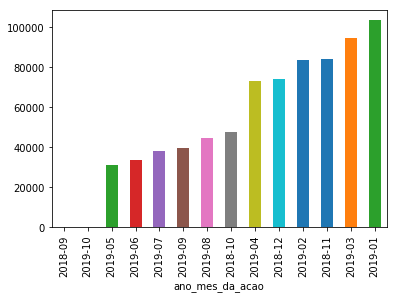

In [27]:
ofertante['comprou'].plot(kind = "bar")